In [1]:
import torch
import torchvision.models.detection as tmd
import torchvision
import matplotlib.pyplot as plt

In [2]:
import gc
torch.cuda.empty_cache()
gc.collect()

0

In [3]:
model = tmd.fasterrcnn_resnet50_fpn_v2(weights=torchvision.models.detection.FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT).cuda()

In [4]:
from PIL import Image
model.eval()
input_image = Image.open(r"C:\Users\get2b\Desktop\Arav\AI ML\DATA SETS\Neural Network Datasets\Object Detection\VOCdevkit\VOC2007\JPEGImages\000009.jpg")
in_image = torchvision.transforms.ToTensor()(input_image).cuda()
output = model(in_image.unsqueeze(0))

In [5]:
output[0]['boxes'] = torch.Tensor.detach(output[0]['boxes'])

In [7]:
output[0]['boxes'] = torch.Tensor.numpy(torch.Tensor.cpu(output[0]['boxes']))

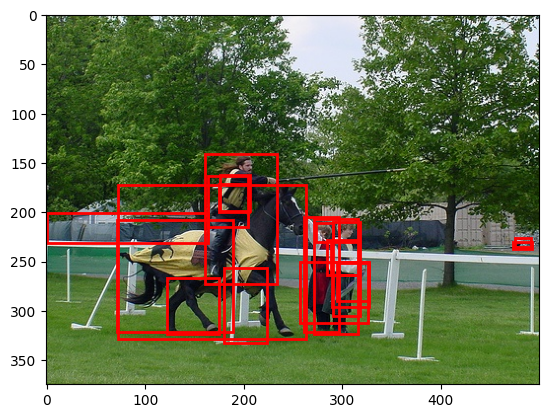

In [8]:
from matplotlib.patches import Rectangle
import matplotlib
plt.imshow(input_image)
for j in range(0,len(output[0]['boxes'])):
    i = output[0]['boxes']
    x_min = i[j][0]
    x_max = i[j][2]
    y_min = i[j][1]
    y_max = i[j][3]
    w = x_max-x_min
    h = y_max-y_min
    plt.gca().add_patch(Rectangle((x_min,y_min),w,h,
                        edgecolor='red',
                        facecolor='none',
                        lw=2))

In [9]:
i = output[0]
boxes,labels,scores=[],[],[]
for j in range(0,len(output[0]['boxes'])):
    if i['scores'][j]>0.5:
        boxes.append(i['boxes'][j])
        labels.append(i['labels'][j])
        scores.append(i['scores'][j])

In [10]:
boxes

[array([ 72.569275, 172.62442 , 263.59567 , 328.6195  ], dtype=float32),
 array([161.16574, 140.45895, 234.20874, 272.39062], dtype=float32),
 array([271.01178, 206.46767, 316.17752, 323.10852], dtype=float32),
 array([260.9931 , 204.93399, 297.06998, 321.91953], dtype=float32),
 array([475.28354, 226.02939, 491.94373, 235.45802], dtype=float32)]

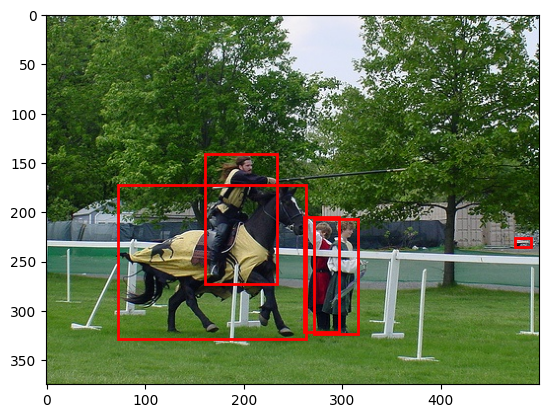

In [11]:
plt.imshow(input_image)
for j in range(0,len(boxes)):
    x_min = boxes[j][0]
    x_max = boxes[j][2]
    y_min = boxes[j][1]
    y_max = boxes[j][3]
    w = x_max-x_min
    h = y_max-y_min
    plt.gca().add_patch(Rectangle((x_min,y_min),w,h,
                        edgecolor='red',
                        facecolor='none',
                        lw=2))

In [12]:
dataset = torchvision.datasets.VOCDetection(root=r'C:\Users\get2b\Desktop\Arav\AI ML\DATA SETS\Neural Network Datasets\Object Detection',year="2007",image_set='val')

In [13]:
valset_im=[]
valset=[]
for i in range(0,64):
    valset_im.append(torchvision.transforms.ToTensor()(dataset[i][0]).cuda())

In [14]:
valset_im[0].shape
outputs = model(valset_im[0].unsqueeze(0))

In [15]:
outputs

[{'boxes': tensor([[4.6713e+00, 2.4417e+02, 6.8316e+01, 3.7500e+02],
          [1.6498e+02, 2.6476e+02, 2.5171e+02, 3.6914e+02],
          [4.5650e+02, 1.5028e+02, 4.7358e+02, 1.6785e+02],
          [2.7817e+02, 1.8545e+02, 3.0768e+02, 2.1691e+02],
          [2.6321e+02, 2.1064e+02, 3.1824e+02, 3.2803e+02],
          [2.4488e+02, 1.9304e+02, 2.8251e+02, 2.9285e+02],
          [4.5162e+02, 1.4008e+02, 4.7765e+02, 1.7429e+02],
          [3.1210e-01, 1.9767e+02, 3.6273e+01, 3.7161e+02],
          [4.4458e+02, 1.3289e+02, 4.8544e+02, 1.8647e+02],
          [1.0189e-01, 1.9829e+02, 3.8847e+01, 2.4882e+02],
          [3.2545e+02, 1.8979e+02, 3.7744e+02, 2.2254e+02],
          [2.9712e+02, 2.0329e+02, 3.7437e+02, 3.7026e+02],
          [9.1232e-02, 2.3492e+01, 1.0492e+01, 5.4065e+01],
          [2.9533e+02, 2.0915e+02, 3.7453e+02, 3.7285e+02],
          [2.5257e+02, 3.6132e+02, 2.9328e+02, 3.7500e+02],
          [2.0736e+02, 3.4752e+02, 3.6966e+02, 3.7476e+02],
          [3.0608e+02, 1.8994e+

In [17]:
outputs[0]['boxes'] =(torch.Tensor.detach(outputs[0]['boxes']))

In [18]:
outputs[0]['boxes'] = torch.Tensor.numpy(torch.Tensor.cpu(outputs[0]['boxes']))

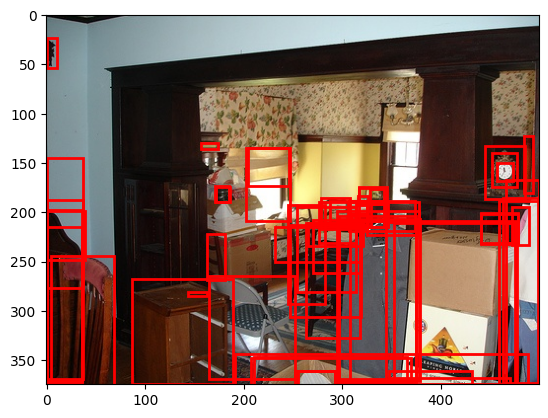

In [23]:
from matplotlib.patches import Rectangle
import matplotlib
plt.imshow(dataset[0][0])
for j in range(0,len(outputs[0]['boxes'])):
    i = outputs[0]['boxes']
    x_min = i[j][0]
    x_max = i[j][2]
    y_min = i[j][1]
    y_max = i[j][3]
    w = x_max-x_min
    h = y_max-y_min
    plt.gca().add_patch(Rectangle((x_min,y_min),w,h,
                        edgecolor='red',
                        facecolor='none',
                        lw=2))

In [24]:
i = outputs[0]
boxes,labels,scores=[],[],[]
for j in range(0,len(outputs[0]['boxes'])):
    if i['scores'][j]>0.5:
        boxes.append(i['boxes'][j])
        labels.append(i['labels'][j])
        scores.append(i['scores'][j])

In [31]:
boxes,labels

([array([  4.671344, 244.17314 ,  68.31553 , 375.      ], dtype=float32),
  array([164.98114, 264.7626 , 251.7091 , 369.1401 ], dtype=float32),
  array([456.49844, 150.28204, 473.5781 , 167.8519 ], dtype=float32),
  array([278.16946, 185.44614, 307.68475, 216.91042], dtype=float32),
  array([263.21402, 210.63914, 318.24152, 328.03055], dtype=float32),
  array([244.87852, 193.04175, 282.50516, 292.84912], dtype=float32),
  array([451.62213, 140.07579, 477.6486 , 174.28821], dtype=float32),
  array([3.1209663e-01, 1.9766934e+02, 3.6272598e+01, 3.7160876e+02],
        dtype=float32),
  array([444.5829 , 132.88654, 485.4448 , 186.46709], dtype=float32),
  array([1.0188570e-01, 1.9828551e+02, 3.8846996e+01, 2.4882254e+02],
        dtype=float32),
  array([325.45   , 189.7938 , 377.44452, 222.54074], dtype=float32)],
 [tensor(62, device='cuda:0'),
  tensor(62, device='cuda:0'),
  tensor(85, device='cuda:0'),
  tensor(62, device='cuda:0'),
  tensor(62, device='cuda:0'),
  tensor(62, device='c

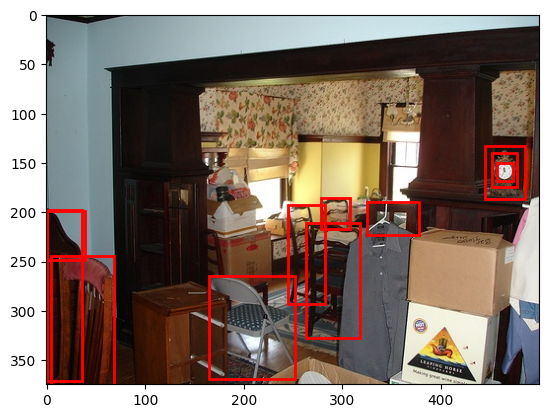

In [28]:
plt.imshow(dataset[0][0])
for j in range(0,len(boxes)):
    x_min = boxes[j][0]
    x_max = boxes[j][2]
    y_min = boxes[j][1]
    y_max = boxes[j][3]
    w = x_max-x_min
    h = y_max-y_min
    plt.gca().add_patch(Rectangle((x_min,y_min),w,h,
                        edgecolor='red',
                        facecolor='none',
                        lw=2))

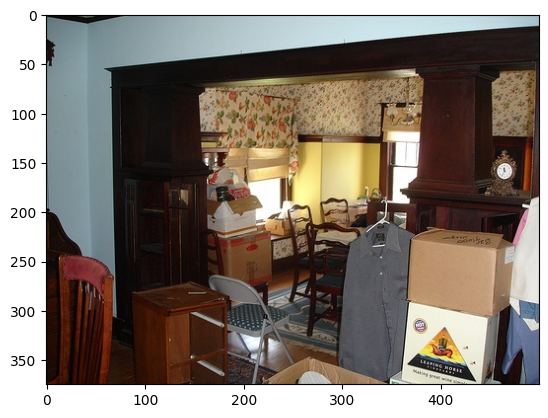

In [29]:
plt.imshow(dataset[0][0])